## Data from World Happiness Report

The World Happiness Report is an annual publication of the United Nations Sustainable Development Solutions Network. It contains articles, and rankings of national happiness based on respondent ratings of their own lives, which the report also correlates with various life factors.

In this notebook we will explore the happiness of different countries and the features associated.
The datasets that we will use are available in *Data*: **happiness2020.pkl** and **countries_info.csv**.

Although the features are self-explanatory, here a summary: 

**happiness2020.pkl**
* country: *Name of the country*
* happiness_score: *Happiness score*
* social_support: *Social support (mitigation the effects of inequality)*
* healthy_life_expectancy: *Healthy Life Expectancy*
* freedom_of_choices: *Freedom to make life choices*
* generosity: *Generosity (charity, volunteers)*
* perception_of_corruption: *Corruption Perception*
* world_region: *Area of the world of the country*

**countries_info.csv**
* country_name: *Name of the country*
* area: *Area in sq mi*
* population: *Number of people*
* literacy: *Literacy percentage*

In [1]:
!head Data/countries_info.csv

country_name,area,population,literacy
afghanistan,647500,31056997,"36,0"
albania,28748,3581655,"86,5"
algeria,2381740,32930091,"70,0"
argentina,2766890,39921833,"97,1"
armenia,29800,2976372,"98,6"
australia,7686850,20264082,"100,0"
austria,83870,8192880,"98,0"
azerbaijan,86600,7961619,"97,0"
bahrain,665,698585,"89,1"


In [2]:
import pandas as pd
%matplotlib inline

DATA_FOLDER = 'Data/'

HAPPINESS_DATASET = DATA_FOLDER+"happiness2020.csv"
COUNTRIES_DATASET = DATA_FOLDER+"countries_info.csv"

## Task 1: Load the data

Load the 2 datasets in Pandas dataframes (called *happiness* and *countries*), and show the first rows.


**Hint**: Use the correct reader and verify the data has the expected format.

In [3]:
happiness = pd.read_csv(HAPPINESS_DATASET)
happiness.head()

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa
3,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean
4,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States


In [4]:
countries = pd.read_csv(COUNTRIES_DATASET)
countries.head()

,country_name,area,population,literacy
0,afghanistan,647500,31056997,"36,0"
1,albania,28748,3581655,"86,5"
2,algeria,2381740,32930091,"70,0"
3,argentina,2766890,39921833,"97,1"
4,armenia,29800,2976372,"98,6"


## Task 2: Let's merge the data

Create a dataframe called *country_features* by merging *happiness* and *countries*. A row of this dataframe must describe all the features that we have about a country.

**Hint**: Verify that all the rows are in the final dataframe.

In [5]:
# Make both country columns lowercase so they match
happiness['country'] = happiness['country'].str.lower()
countries['country_name'] = countries['country_name'].str.lower()

# Merge directly
country_features = pd.merge(
    happiness,
    countries,
    left_on="country",
    right_on="country_name",
    how="inner"   # only matching countries will remain
)

country_features.head()

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,country_name,area,population,literacy
0,afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,afghanistan,647500,31056997,"36,0"
1,albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,albania,28748,3581655,"86,5"
2,algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,algeria,2381740,32930091,"70,0"
3,argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,argentina,2766890,39921833,"97,1"
4,armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,armenia,29800,2976372,"98,6"


## Task 3: Where are people happier?

Print the top 10 countries based on their happiness score (higher is better).

In [6]:
# Top 10 countries by happiness score
top10 = country_features[['country', 'happiness_score']].sort_values(
    by="happiness_score", ascending=False
).head(10)

top10

,country,happiness_score
38,finland,7.8087
31,denmark,7.6456
115,switzerland,7.5599
50,iceland,7.5045
92,norway,7.4880
87,netherlands,7.4489
114,sweden,7.3535
88,new zealand,7.2996
6,austria,7.2942
72,luxembourg,7.2375


We are interested to know in what world region people are happier. 

Create and print a dataframe with the (1) average happiness score and (2) the number of contries for each world region.
Sort the result to show the happiness ranking.

In [7]:
# Average happiness score and number of countries per region
region_stats = (
    country_features
    .groupby("world_region")
    .agg(
        avg_happiness=("happiness_score", "mean"),
        num_countries=("country", "count")
    )
    .reset_index()
    .sort_values(by="avg_happiness", ascending=False)
)

region_stats


,world_region,avg_happiness,num_countries
5,North America and ANZ,7.173525,4
9,Western Europe,6.967405,20
3,Latin America and Caribbean,5.971280,20
0,Central and Eastern Europe,5.891393,14
7,Southeast Asia,5.517788,8
2,East Asia,5.483633,3
1,Commonwealth of Independent States,5.358342,12
4,Middle East and North Africa,5.269306,16
8,Sub-Saharan Africa,4.393856,32
6,South Asia,4.355083,6


The first region has only a few countries! What are them and what is their score?

In [8]:
# Identify the happiest region (first row of region_stats)
happiest_region = region_stats.iloc[0]["world_region"]

print("Happiest region:", happiest_region)

# Show the countries in that region with their happiness scores
country_features.loc[
    country_features["world_region"] == happiest_region,
    ["country", "happiness_score"]
]

Happiest region: North America and ANZ


,country,happiness_score
5,australia,7.2228
21,canada,7.2321
88,new zealand,7.2996
127,united states,6.9396


## Task 4: How literate is the world?

Print the names of the countries with a level of literacy of 100%. 

For each country, print the name and the world region in the format: *{region name} - {country name} ({happiness score})*

In [10]:
# Fix literacy column only (since it has commas as decimal separator)
country_features['literacy'] = country_features['literacy'].astype(str).str.replace(',', '.').astype(float)

# Make sure population is numeric (if not already)
country_features['population'] = pd.to_numeric(country_features['population'], errors='coerce')

# Countries with 100% literacy
full_literacy = country_features[country_features['literacy'] == 100][
    ['world_region', 'country', 'happiness_score']
]

for _, r in full_literacy.iterrows():
    print(f"{r.world_region} - {r.country} ({r.happiness_score})")

North America and ANZ - australia (7.222799778)
Western Europe - denmark (7.645599842)
Western Europe - finland (7.808700085)
Western Europe - luxembourg (7.237500191)
Western Europe - norway (7.487999916000001)


What is the global average?

In [11]:
global_avg = country_features['literacy'].mean()
print("Global average literacy:", round(global_avg, 2), "%")

Global average literacy: 81.85 %


Calculate the proportion of countries with a literacy level below 50%. Print the value in percentage, formatted with 2 decimals.

In [12]:
low_lit = (country_features['literacy'] < 50).sum()
total = country_features['literacy'].notna().sum()
print("Proportion of countries with literacy <50%:", round(100 * low_lit / total, 2), "%")

Proportion of countries with literacy <50%: 12.03 %


Print the raw number and the percentage of world population that is illiterate.

In [13]:
illiterate_pop = (country_features['population'] * (1 - country_features['literacy'] / 100)).sum()
world_pop = country_features['population'].sum()

print("Illiterate population:", int(illiterate_pop))
print("Share of world population illiterate:", round(100 * illiterate_pop / world_pop, 2), "%")

Illiterate population: 1249372988
Share of world population illiterate: 20.33 %


## Task 5: Population density

Add to the dataframe a new field called *population_density* computed by dividing *population* by *area*.

In [14]:
# Ensure numeric types
country_features['population'] = pd.to_numeric(country_features['population'], errors='coerce')
country_features['area'] = pd.to_numeric(country_features['area'], errors='coerce')

# Compute population density (people per unit area)
country_features['population_density'] = country_features['population'] / country_features['area']

# Preview
country_features[['country', 'population', 'area', 'population_density']].head()

,country,population,area,population_density
0,afghanistan,31056997,647500,47.964474
1,albania,3581655,28748,124.587971
2,algeria,32930091,2381740,13.826065
3,argentina,39921833,2766890,14.428413
4,armenia,2976372,29800,99.878255


What is the happiness score of the 3 countries with the lowest population density?

In [15]:
lowest_density = country_features.nsmallest(3, 'population_density')[
    ['country', 'population_density', 'happiness_score']
]

lowest_density

,country,population_density,happiness_score
83,mongolia,1.810751,5.4562
5,australia,2.636201,7.2228
14,botswana,2.731371,3.4789


## Task 6: Healty and happy?

Plot in a scatter plot the happiness score (x) and healty life expectancy (y).

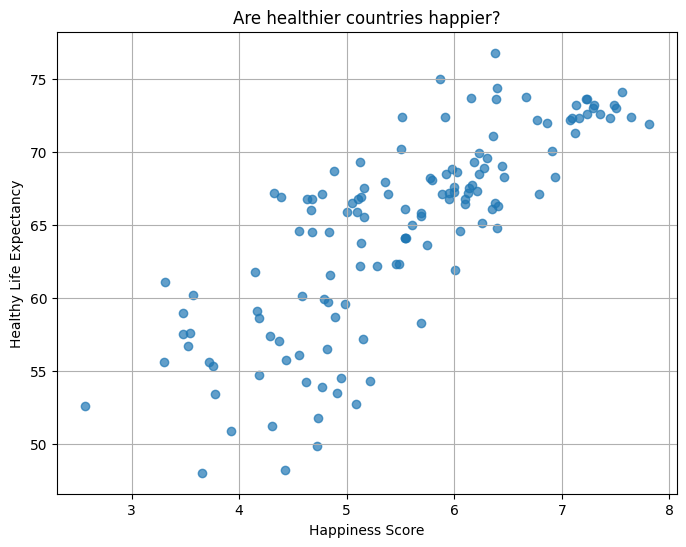

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(
    country_features['happiness_score'],
    country_features['healthy_life_expectancy'],
    alpha=0.7
)

plt.xlabel("Happiness Score")
plt.ylabel("Healthy Life Expectancy")
plt.title("Are healthier countries happier?")
plt.grid(True)
plt.show()

Feel free to continue the exploration of the dataset! We'll release the solutions next week.

----
Enjoy EPFL and be happy, next year Switzerland must be #1.